<a href="https://colab.research.google.com/github/iamhlasoe/btc-price-prediction/blob/main/notebooks/DataPreprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MSc. DA Project: Bitcoin price prediction using Sentiment analysis and Deep Learning

In [34]:
# @title Importing Libraries
import datetime
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'utils'

In [33]:
url = "https://raw.githubusercontent.com/iamhlasoe/btc-price-prediction/refs/heads/main/data/"
df = pd.read_csv(url+"NewDate_Bitcoin_Tweets_And_Price_Dataset.csv",parse_dates=["Date"])

In [7]:
df.head()

,Date,Compound_Score,Total Volume of Tweets,Count_Negatives,Count_Positives,Count_Neutrals,Sent_Negatives,Sent_Positives,Count_News,Count_Bots,Open,High,Low,Close,Volume (BTC),Volume (Currency)
0,2017-08-01 00:00:00,0.082893,1027,139,347,397,-0.516620,0.417882,695,144,2855.81,2863.06,2823.00,2825.92,184.02,522951.00
1,2017-08-01 01:00:00,0.053160,778,111,193,320,-0.423402,0.415385,493,154,2823.01,2860.02,2821.01,2853.38,77.30,219605.16
2,2017-08-01 02:00:00,0.124251,836,89,273,264,-0.440938,0.428661,510,210,2846.27,2858.04,2837.31,2841.60,135.83,386739.15
3,2017-08-01 03:00:00,-0.021036,984,250,236,314,-0.441173,0.396034,683,184,2841.84,2863.88,2837.73,2862.93,143.20,408360.03
4,2017-08-01 04:00:00,0.055437,751,114,195,305,-0.414978,0.417159,517,137,2862.92,2876.00,2848.11,2874.99,222.53,637045.88


In [8]:
df.tail()

,Date,Compound_Score,Total Volume of Tweets,Count_Negatives,Count_Positives,Count_Neutrals,Sent_Negatives,Sent_Positives,Count_News,Count_Bots,Open,High,Low,Close,Volume (BTC),Volume (Currency)
12353,2019-01-21 19:00:00,0.048459,1060,282,342,277,-0.418572,0.472804,639,159,3580.20,3585.98,3579.05,3579.58,8.980857e+07,2.720000e+16
12354,2019-01-21 20:00:00,0.059675,978,235,331,307,-0.441124,0.470575,645,105,3578.11,3581.83,3576.98,3580.66,7.712956e+08,2.670000e+16
12355,2019-01-21 21:00:00,0.111140,917,176,350,268,-0.476070,0.491524,528,123,3580.26,3582.38,3559.74,3560.70,1.176079e+08,2.670000e+15
12356,2019-01-21 22:00:00,0.057693,929,237,317,266,-0.408008,0.454277,534,109,3561.58,3569.04,3535.19,3567.92,1.832454e+04,2.750000e+15
12357,2019-01-21 23:00:00,0.114312,899,150,296,287,-0.379605,0.475444,467,166,3569.34,3579.33,3569.34,3573.67,1.010520e+04,2.760000e+15


In [9]:
df.shape

(12358, 16)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12358 entries, 0 to 12357
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    12358 non-null  datetime64[ns]
 1   Compound_Score          12358 non-null  float64       
 2   Total Volume of Tweets  12358 non-null  int64         
 3   Count_Negatives         12358 non-null  int64         
 4   Count_Positives         12358 non-null  int64         
 5   Count_Neutrals          12358 non-null  int64         
 6   Sent_Negatives          12358 non-null  float64       
 7   Sent_Positives          12357 non-null  float64       
 8   Count_News              12358 non-null  int64         
 9   Count_Bots              12358 non-null  int64         
 10  Open                    12358 non-null  float64       
 11  High                    12358 non-null  float64       
 12  Low                     12358 non-null  float6

In [11]:
df.describe()

,Date,Compound_Score,Total Volume of Tweets,Count_Negatives,Count_Positives,Count_Neutrals,Sent_Negatives,Sent_Positives,Count_News,Count_Bots,Open,High,Low,Close,Volume (BTC),Volume (Currency)
count,12358,12358.000000,12358.000000,12358.000000,12358.000000,12358.000000,12358.000000,12357.000000,12358.000000,12358.000000,12358.000000,12358.000000,12358.00000,12358.000000,1.235800e+04,1.231200e+04
mean,2018-04-28 08:34:45.483087616,0.102471,1435.306603,231.219372,450.643227,529.477424,-0.408891,0.472846,932.235313,223.966095,7272.738185,7319.294351,7222.11814,7272.666525,1.071700e+08,1.165878e+16
min,2017-08-01 00:00:00,-0.180767,3.000000,1.000000,0.000000,2.000000,-0.700246,0.175518,3.000000,0.000000,2665.210000,2697.300000,2615.00000,2672.400000,1.000000e+00,1.612128e+05
25%,2017-12-14 05:15:00,0.078411,953.000000,130.000000,290.000000,332.000000,-0.431987,0.452991,596.000000,160.250000,4897.482500,4933.740000,4863.84250,4897.895000,5.841790e+03,4.585000e+14
50%,2018-04-30 22:30:00,0.102270,1239.000000,184.000000,387.000000,449.000000,-0.409077,0.474032,807.000000,208.000000,6619.275000,6639.475000,6595.58500,6618.790000,1.428684e+04,4.320000e+15
75%,2018-09-07 06:45:00,0.126179,1681.000000,276.000000,530.000000,628.000000,-0.385703,0.493470,1117.000000,270.000000,8366.147500,8427.945000,8318.17250,8365.727500,3.220379e+04,2.220000e+16
max,2019-01-21 23:00:00,0.487209,12696.000000,3085.000000,4494.000000,4716.000000,-0.187332,0.669546,4485.000000,2092.000000,19784.930000,19870.620000,19691.74000,19784.930000,9.623981e+10,5.240000e+16
std,NaN,0.041871,744.829807,165.694526,249.744699,304.934847,0.039987,0.035919,488.043127,90.558652,3092.503089,3129.294967,3052.08904,3092.611513,1.619954e+09,1.460433e+16


In [12]:
df[['Total Volume of Tweets','Count_Negatives','Count_Positives','Count_Neutrals','Count_Bots','Close']].describe()

,Total Volume of Tweets,Count_Negatives,Count_Positives,Count_Neutrals,Count_Bots,Close
count,12358.000000,12358.000000,12358.000000,12358.000000,12358.000000,12358.000000
mean,1435.306603,231.219372,450.643227,529.477424,223.966095,7272.666525
std,744.829807,165.694526,249.744699,304.934847,90.558652,3092.611513
min,3.000000,1.000000,0.000000,2.000000,0.000000,2672.400000
25%,953.000000,130.000000,290.000000,332.000000,160.250000,4897.895000
50%,1239.000000,184.000000,387.000000,449.000000,208.000000,6618.790000
75%,1681.000000,276.000000,530.000000,628.000000,270.000000,8365.727500
max,12696.000000,3085.000000,4494.000000,4716.000000,2092.000000,19784.930000


In [13]:
df.isnull().sum()

,0
Date,0
Compound_Score,0
Total Volume of Tweets,0
Count_Negatives,0
Count_Positives,0
Count_Neutrals,0
Sent_Negatives,0
Sent_Positives,1
Count_News,0
Count_Bots,0


In [16]:
# @title Date Preprocessing
def convert_date(value):
    if isinstance(value, (int, float)):
        excel_epoch = datetime.datetime(1899, 12, 30)
        return excel_epoch + datetime.timedelta(days=value)
    else:
        try:
            return pd.to_datetime(value, dayfirst=True)
        except ValueError:
            return pd.to_datetime(value, format='%d-%m-%y %H:%M')

df['Date'] = df['Date'].apply(convert_date)

In [17]:
# @title Handling Missing Value
#Selecting the row that has null value in Sent_Positives column

null_row = df[df['Sent_Positives'].isnull()]

In [18]:
null_vol = df[df['Volume (Currency)'].isnull()]


In [19]:
# @title Replacing Null value with zero
df.fillna(0, inplace=True)

In [20]:
#@title Checking Null values
df.isnull().sum()

,0
Date,0
Compound_Score,0
Total Volume of Tweets,0
Count_Negatives,0
Count_Positives,0
Count_Neutrals,0
Sent_Negatives,0
Sent_Positives,0
Count_News,0
Count_Bots,0


In [21]:
# @title Changing date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [22]:
df.Date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 12358 entries, 0 to 12357
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
12358 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 96.7 KB


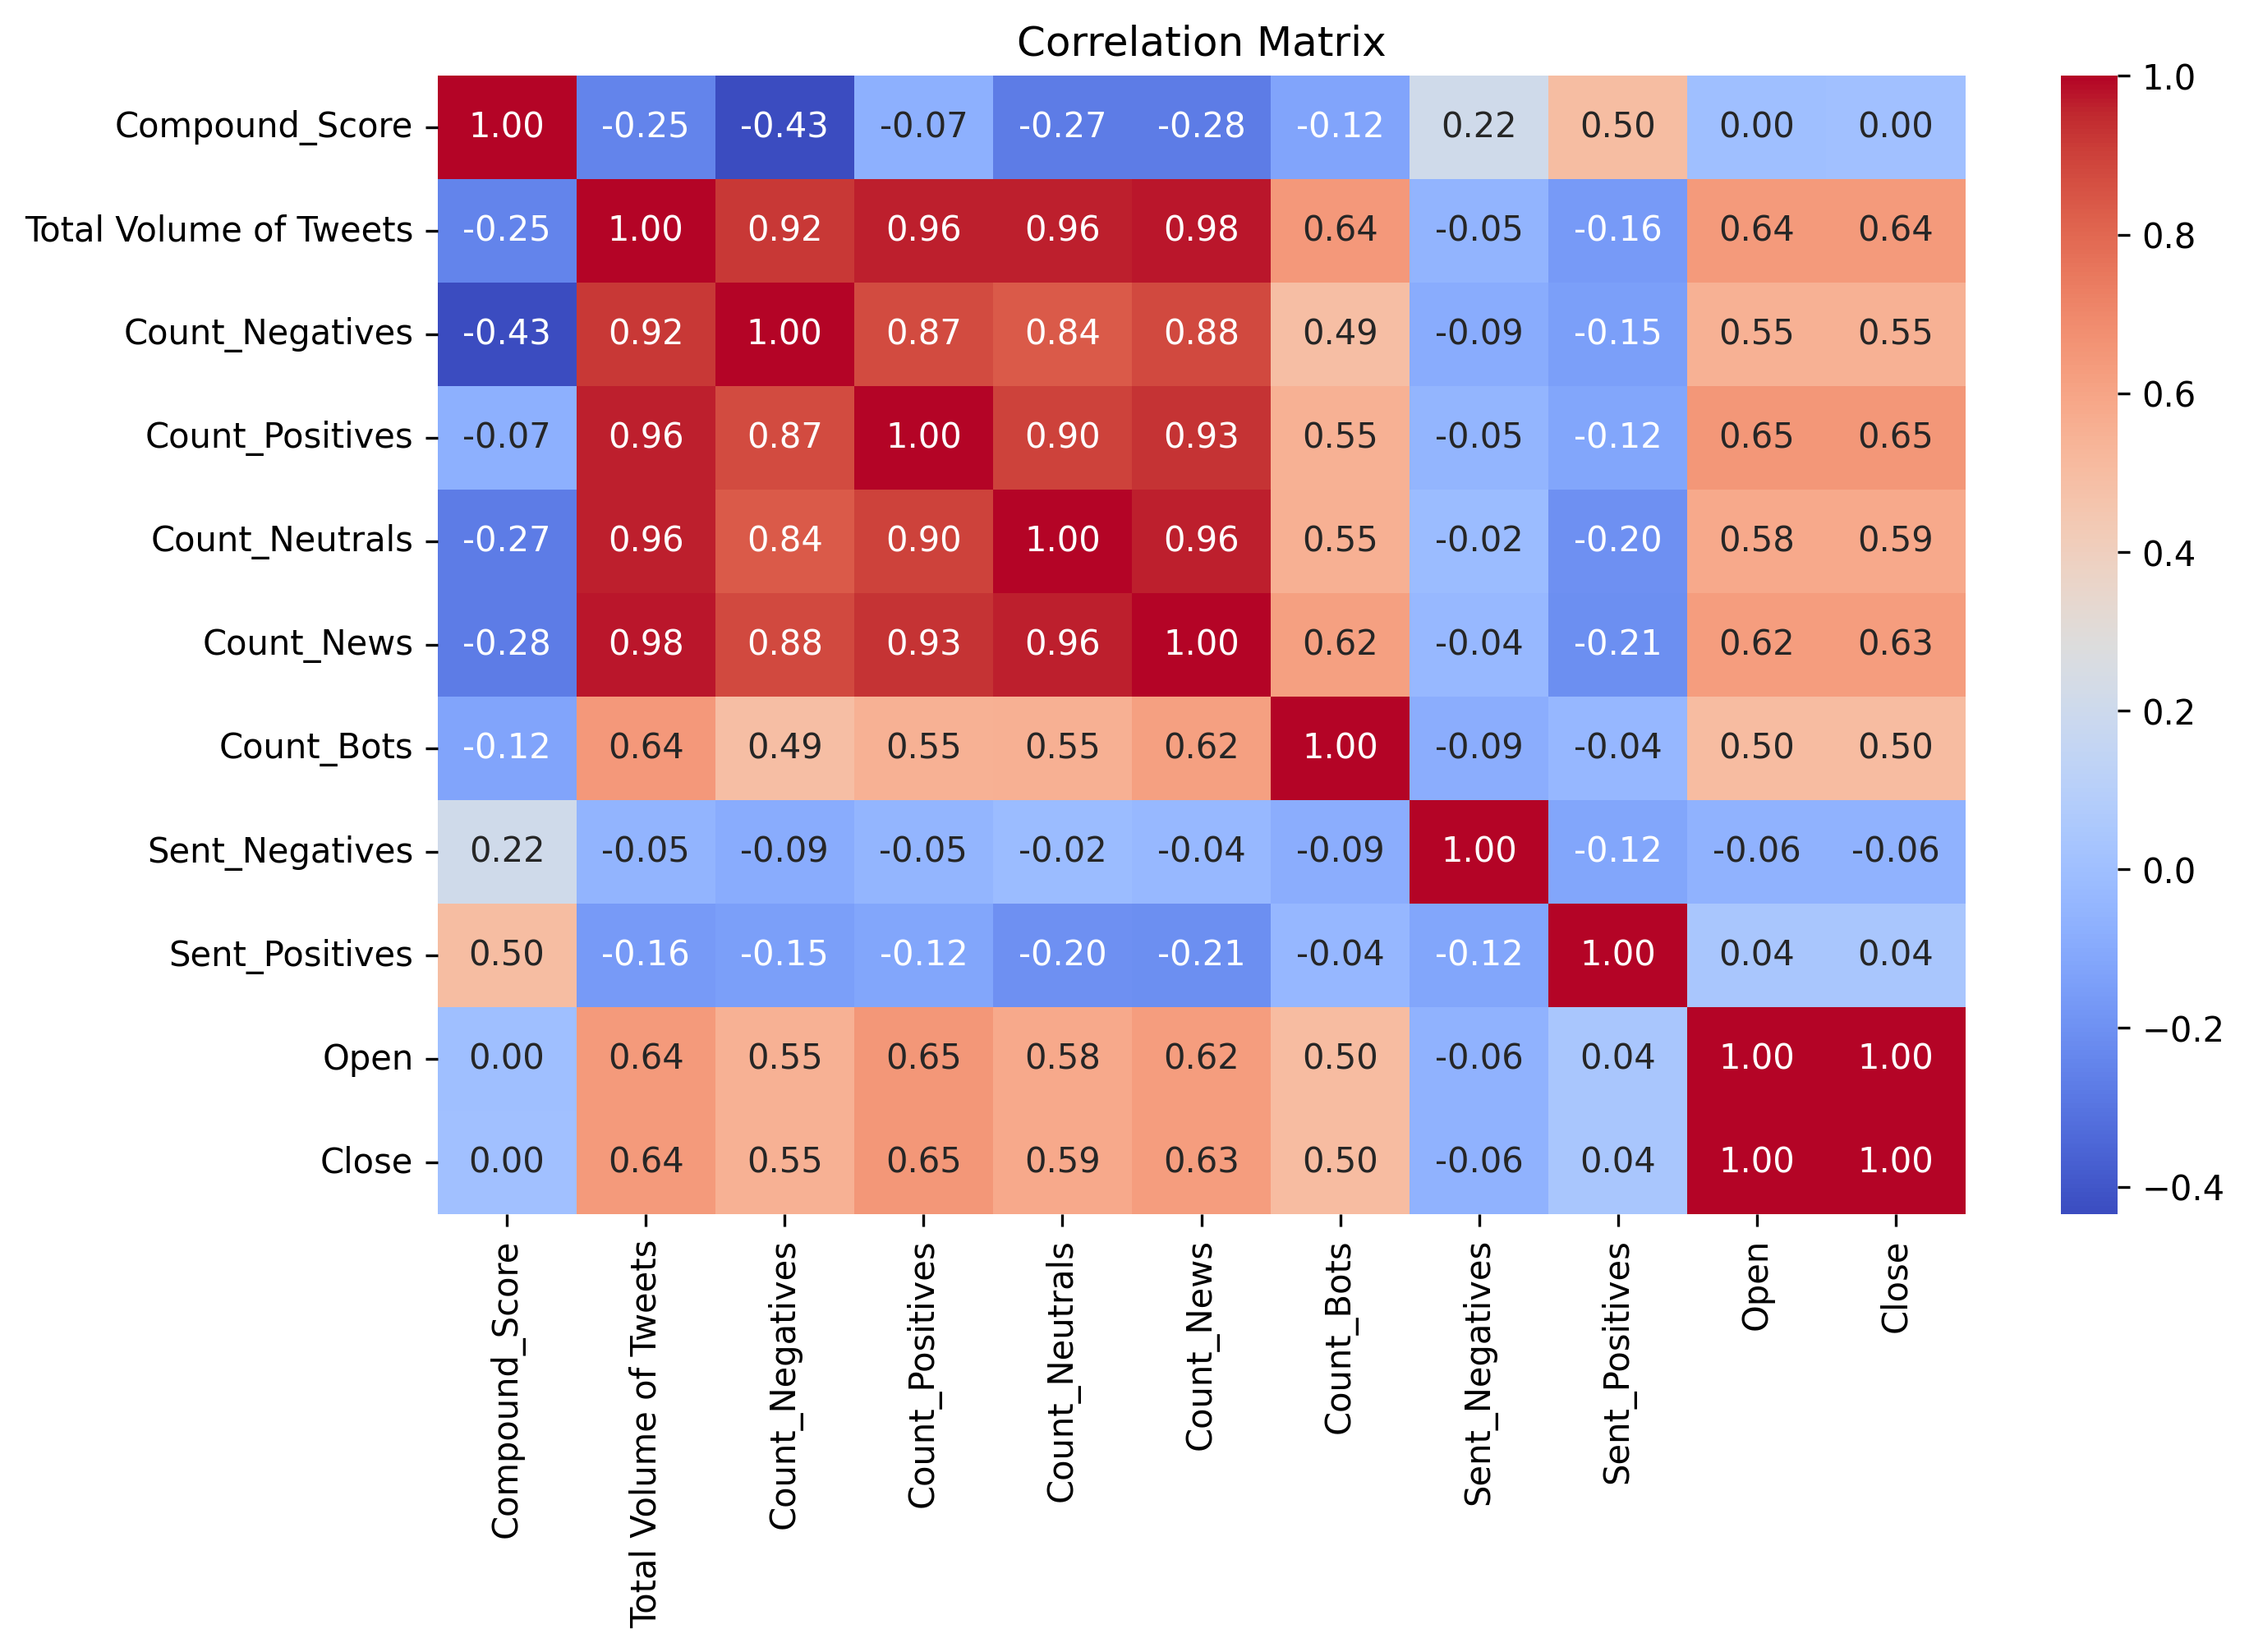

In [23]:
# @title Correlation Analysis with heatmap
select_cols = ['Compound_Score','Total Volume of Tweets','Count_Negatives','Count_Positives','Count_Neutrals','Count_News','Count_Bots','Sent_Negatives','Sent_Positives','Open','Close']
newdf = df[select_cols].copy()
corr = newdf.corr(numeric_only=True)

plt.figure(figsize=(10, 6), dpi=300)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

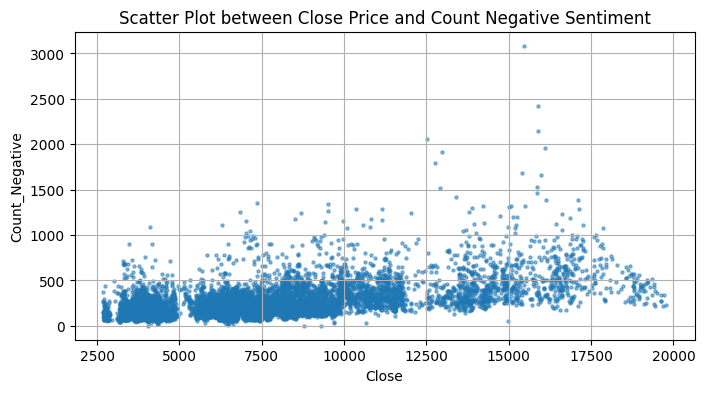

In [24]:
# @title Correlation Analysis Close vs Count_Negatives
plt.figure(figsize=(8, 4))
plt.scatter(df['Close'], df['Count_Negatives'], s=5, alpha=0.5)
#plt.scatter(df['Count_Negatives'], df['Close'], s=5, alpha=0.5)
plt.xlabel('Close')
plt.ylabel('Count_Negative')
plt.title('Scatter Plot between Close Price and Count Negative Sentiment')
plt.grid(True)
plt.show()

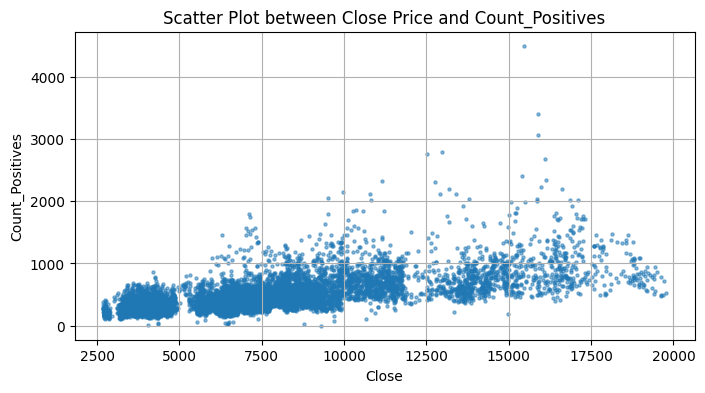

In [25]:
# @title Correlation Analysis Close vs Count_Positives
plt.figure(figsize=(8, 4))
plt.scatter(df['Close'], df['Count_Positives'], s=5, alpha=0.5)

plt.xlabel('Close')
plt.ylabel('Count_Positives')
plt.title('Scatter Plot between Close Price and Count_Positives')
plt.grid(True)
plt.show()

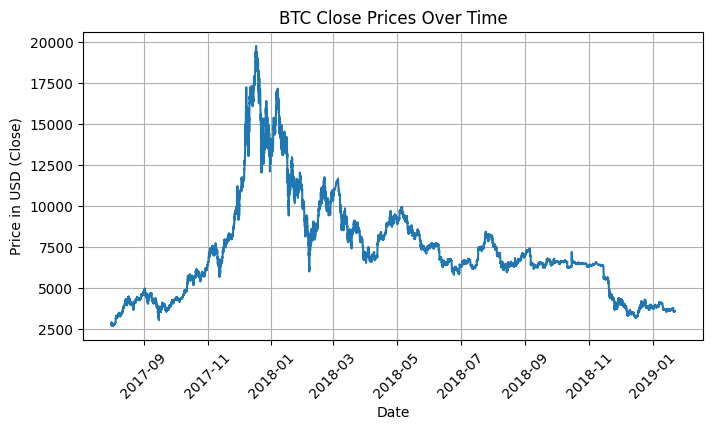

In [26]:
# @title Visualizing BTC Close Price
plt.figure(figsize=(8, 4))
plt.plot(df['Date'], df['Close'])

plt.xlabel('Date')
plt.ylabel('Price in USD (Close)')
plt.title('BTC Close Prices Over Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


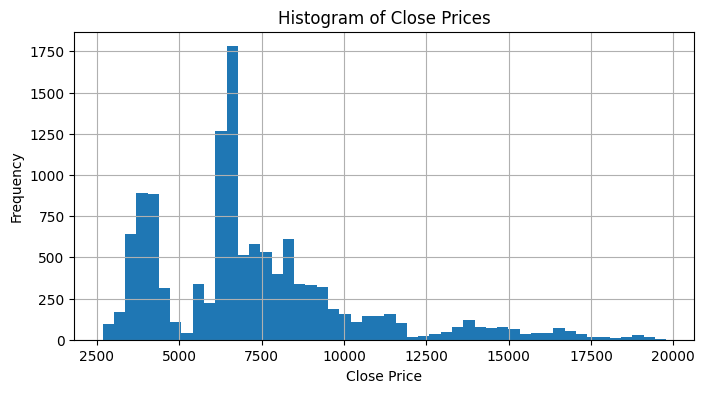

In [27]:
# @title Histogram to find outlier in Close
plt.figure(figsize=(8, 4))
df['Close'].hist(bins=50)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Histogram of Close Prices')
plt.show()


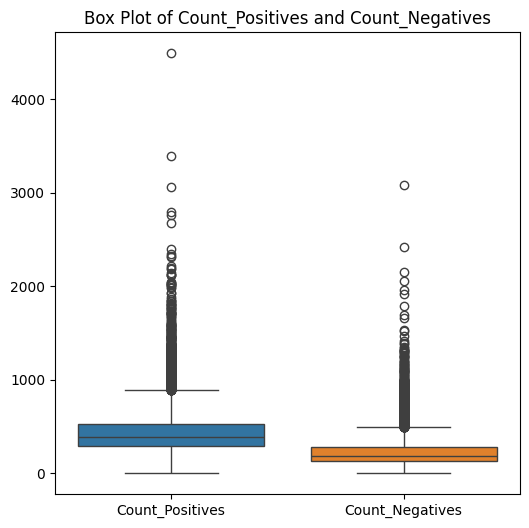

In [28]:
# @title Box plot to find the outlier for Count_Positives, Count_Negatives
plt.figure(figsize=(6, 6))
sns.boxplot(data=df[['Count_Positives', 'Count_Negatives']])
plt.title('Box Plot of Count_Positives and Count_Negatives')
plt.show()

In [ ]:
# @title Saving the cleaned CSV for modeling

#df.to_csv(url+"Cleaned_Dataset.csv", index=False)